In [2]:
library(tidyquant) 

In [17]:
data("FANG") 

# Get AAPL and AMZN Stock Prices
AAPL <- tq_get("AAPL", get = "stock.prices", from = "2015-09-01", to = "2016-12-31")
AMZN <- tq_get("AMZN", get = "stock.prices", from = "2000-01-01", to = "2016-12-31")
end <- as_date("2016-12-31")

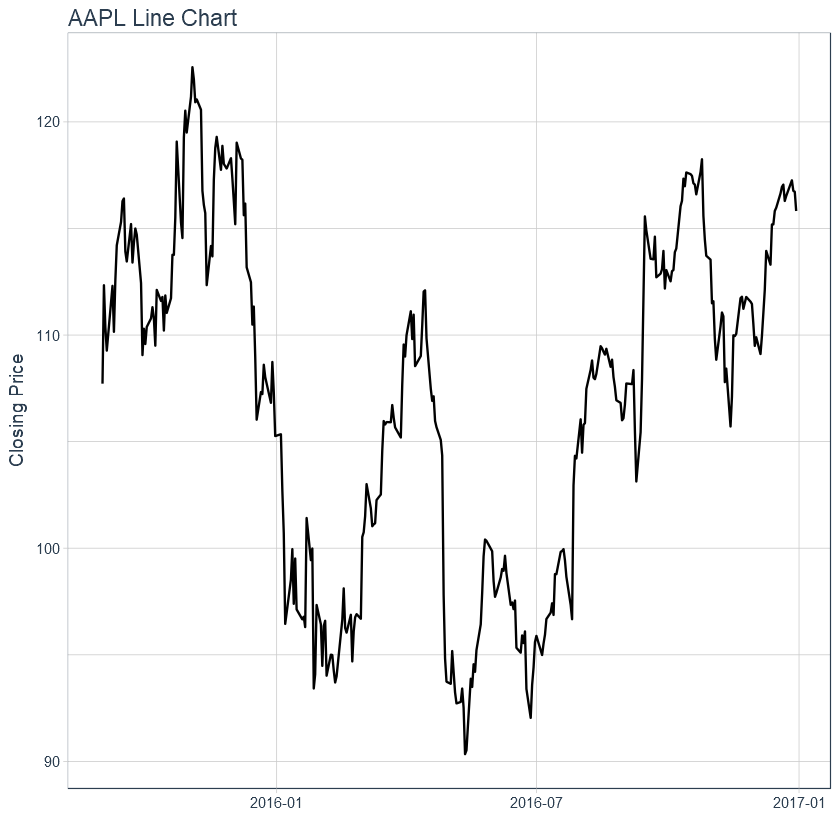

In [6]:
AAPL %>%
    ggplot(aes(x = date, y = close)) +
    geom_line() +
    labs(title = "AAPL Line Chart", y = "Closing Price", x = "") + 
    theme_tq()

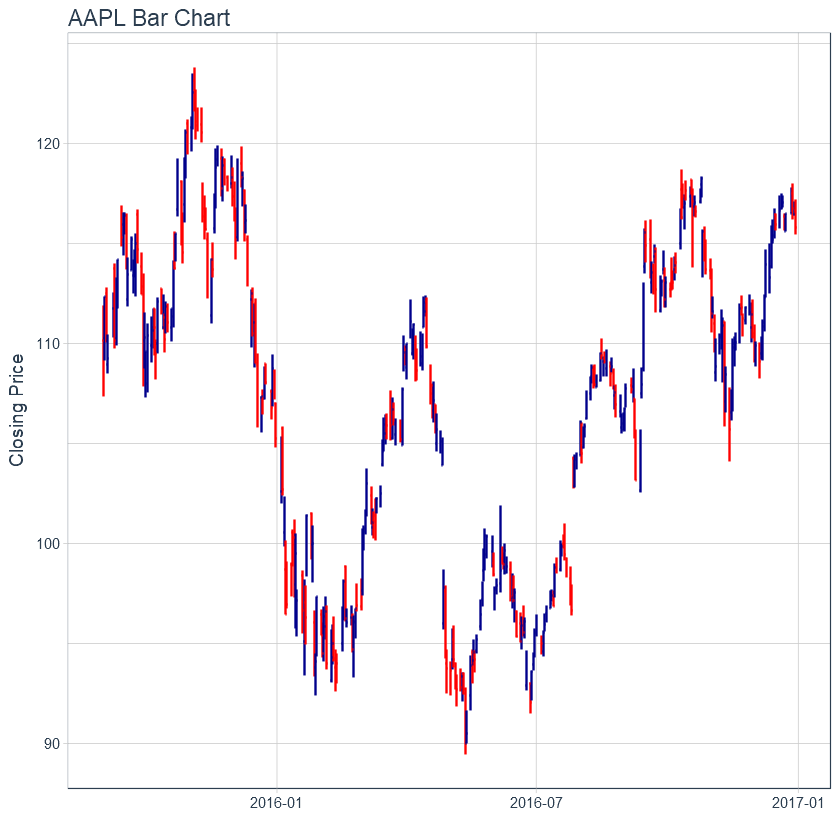

In [8]:
AAPL %>%
    ggplot(aes(x = date, y = close)) +
    geom_barchart(aes(open = open, high = high, low = low, close = close)) +
    labs(title = "AAPL Bar Chart", y = "Closing Price", x = "") + 
    theme_tq()

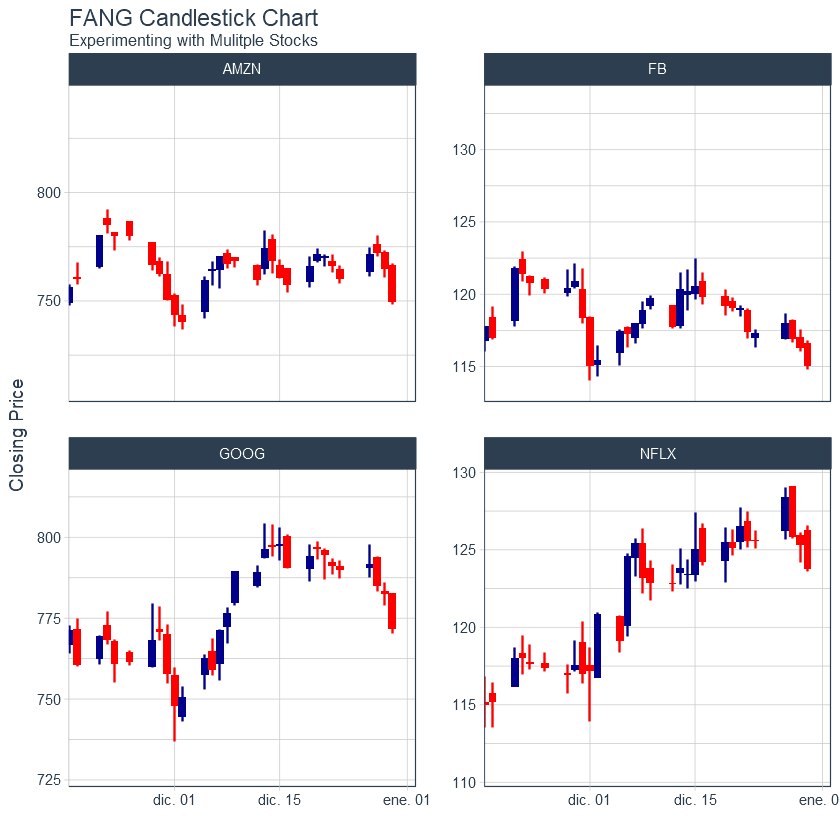

In [19]:
start <- end - weeks(6)
FANG %>%
    filter(date >= start - days(2 * 15)) %>%
    ggplot(aes(x = date, y = close, group = symbol)) +
    geom_candlestick(aes(open = open, high = high, low = low, close = close)) +
    labs(title = "FANG Candlestick Chart", 
         subtitle = "Experimenting with Mulitple Stocks",
         y = "Closing Price", x = "") + 
    coord_x_date(xlim = c(start, end)) +
    facet_wrap(~ symbol, ncol = 2, scale = "free_y") + 
    theme_tq()

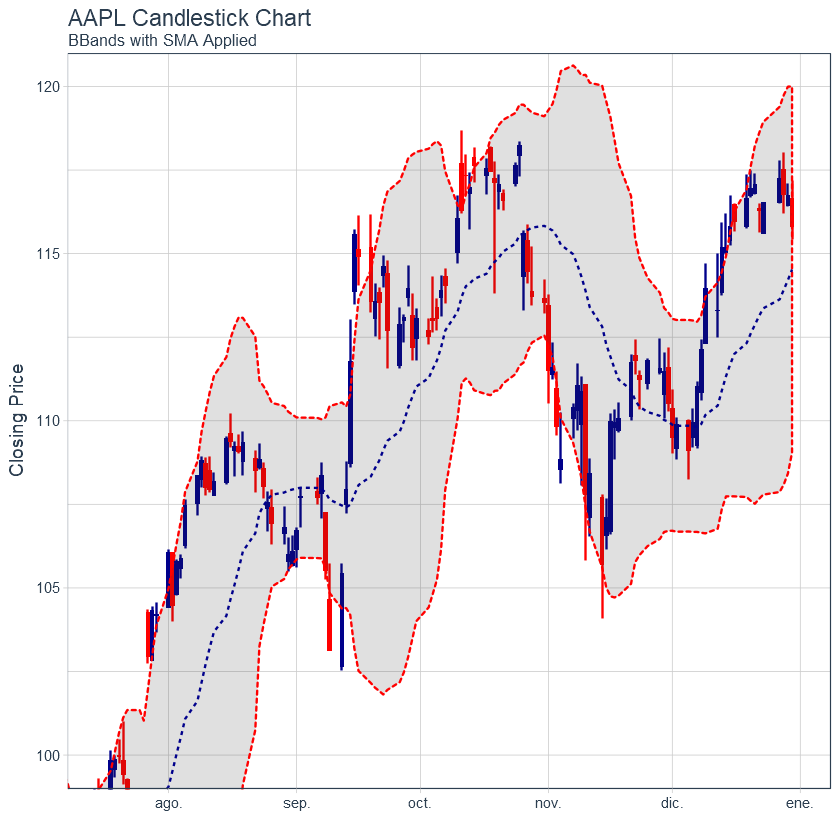

In [20]:
AAPL %>%
    ggplot(aes(x = date, y = close, open = open,
               high = high, low = low, close = close)) +
    geom_candlestick() +
    geom_bbands(ma_fun = SMA, sd = 2, n = 20) +
    labs(title = "AAPL Candlestick Chart", 
         subtitle = "BBands with SMA Applied", 
         y = "Closing Price", x = "") + 
    coord_x_date(xlim = c(end - weeks(24), end),
                 ylim = c(100, 120)) + 
    theme_tq()